In [1]:
import pandas as pd
import ast
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
stops = stopwords.words('english')
stops_dict = {}
for word in stops:
    stops_dict[word]=""

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import os
abspath = os.path.abspath('D:/Box Sync/editorials/scripts/')
os.chdir(abspath)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 150)

import import_func as imp
import tags_work as tgs
import desc_vis as vis
import classifier_help as clh

print("done")

done


In [2]:
# full_advice = "../data/genre_advice_full_021520.jl"
full_filename = "../data/by_article_fulltext_020920.jl"
frequency_filename = "../data/frequency_wordlex.csv"


full_df = imp.init_df(full_filename, "full")
# full_df = full_df[full_df["year"]<2020]

print("done")

done


In [52]:
advice1_heat_filename = "../data/heatmap_data/heatmap1_advice.txt"
advice2_heat_filename = "../data/heatmap_data/heatmap2_advice.txt"
all1_heat_filename = "../data/heatmap_data/heatmap1_all.txt"
all2_heat_filename = "../data/heatmap_data/heatmap2_all.txt"

advice1_heat = pd.read_csv(advice1_heat_filename, delimiter="\t")
advice2_heat = pd.read_csv(advice2_heat_filename, delimiter="\t")
all1_heat = pd.read_csv(all1_heat_filename, delimiter="\t")
all2_heat = pd.read_csv(all2_heat_filename, delimiter="\t")

heat_dfs = [
    advice1_heat,
    advice2_heat,
    all1_heat,
    all2_heat
    ]
titles = ["advice_1","advice_2","all_1","all_2"]

for i in range(len(heat_dfs)):
    df = heat_dfs[i]
    # print(df.head())
    df = df.set_index("year")
    if i == 0:
        df = df.transpose()
    # df = df.transpose()    
    # print(i)
    # print("########################")
    df["mean"] = df.mean(axis=1)
    df = df.sort_values(by="mean", ascending=False)
    heat_dfs[i] = df

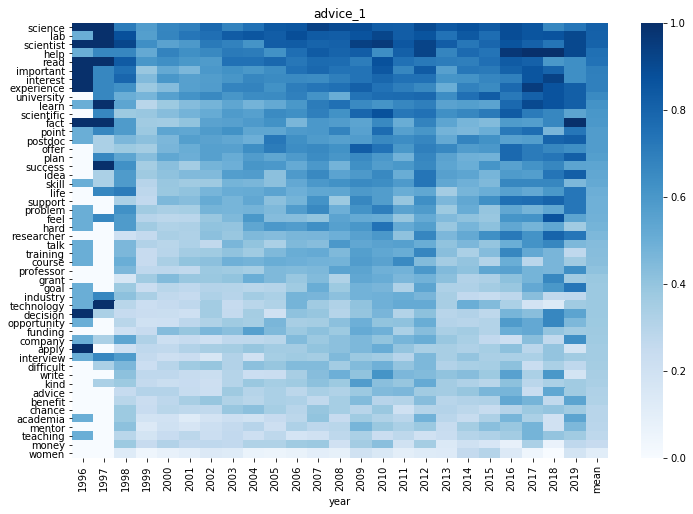

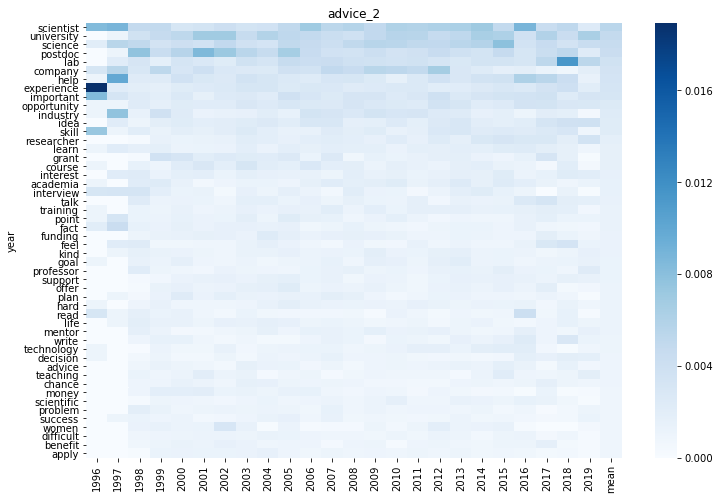

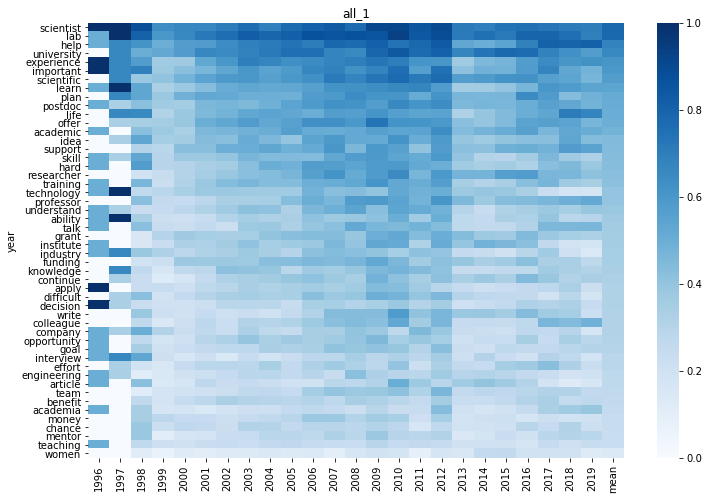

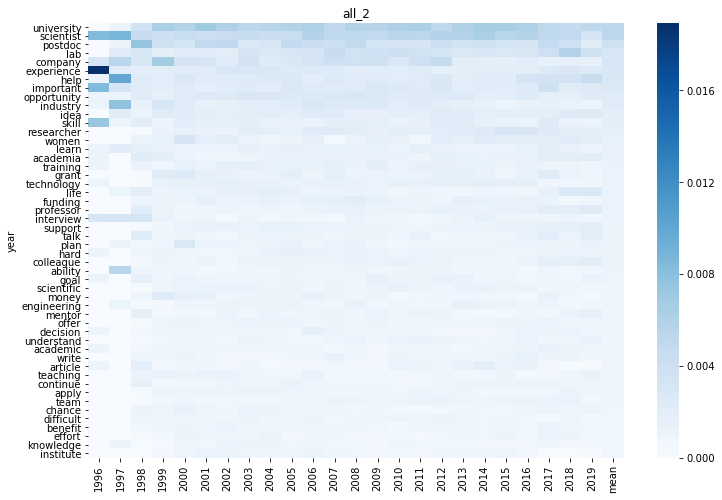

In [53]:
for i in range(len(heat_dfs)):
    df = heat_dfs[i]
    title = titles[i]

    plt.figure(figsize=(12, 8))
    sns.heatmap(df, cmap = "Blues", xticklabels=True, yticklabels=True) # , xticklabels=categories, yticklabels=categories
    plt.title(title)
    plt.savefig("../figs/heatmaps/"+title+".png", bbox_inches="tight")

<Figure size 864x576 with 0 Axes>

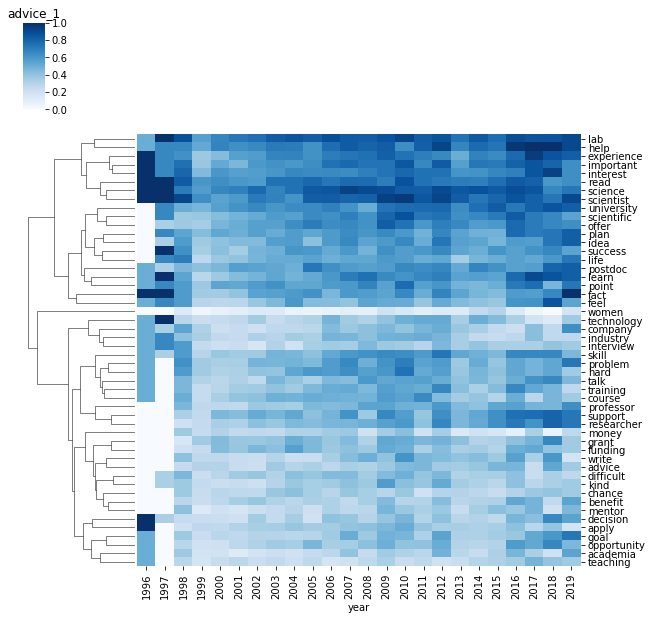

<Figure size 864x576 with 0 Axes>

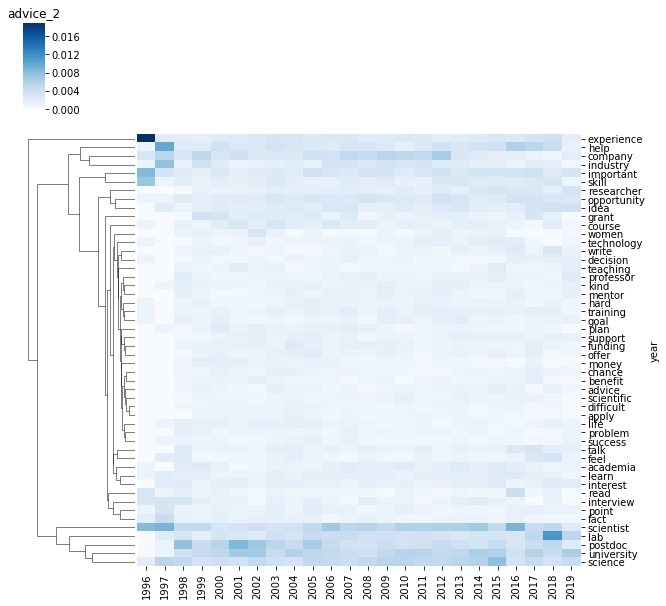

<Figure size 864x576 with 0 Axes>

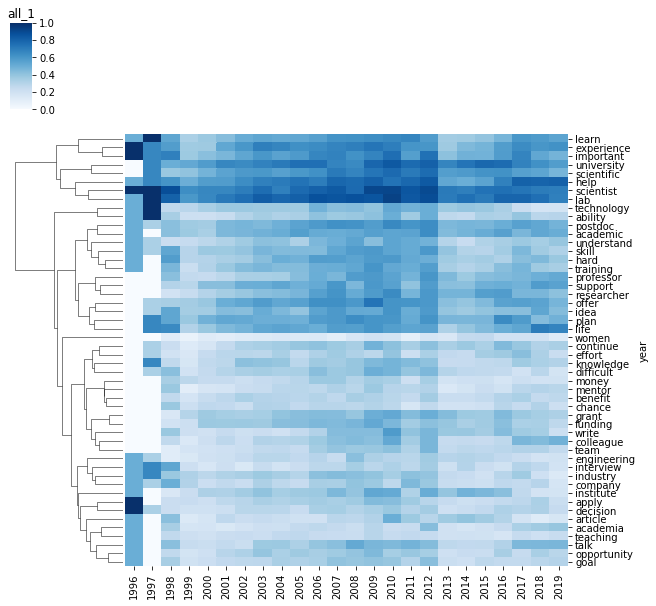

<Figure size 864x576 with 0 Axes>

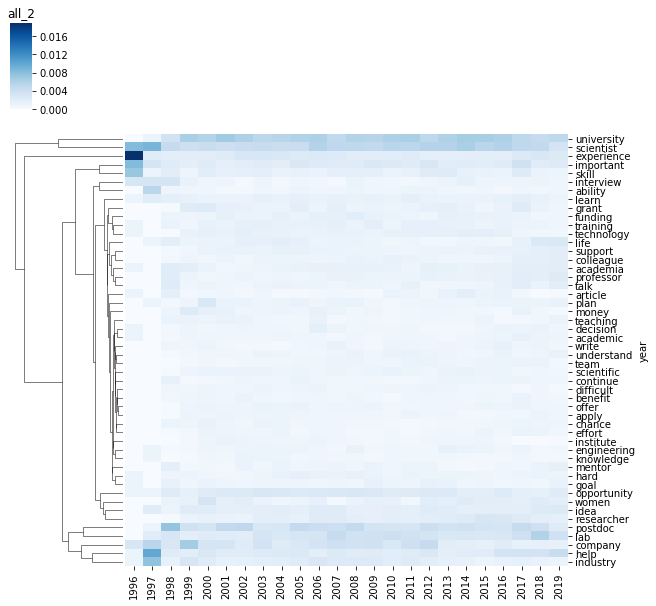

In [57]:
for i in range(len(heat_dfs)):
    df = heat_dfs[i].drop("mean",axis=1)
    title = titles[i]

    plt.figure(figsize=(12, 8))
    sns.clustermap(df, cmap = "Blues",col_cluster=False, xticklabels=True, yticklabels=True) # , xticklabels=categories, yticklabels=categories
    plt.title(title)
    plt.savefig("../figs/heatmaps/cluster_"+title+".png", bbox_inches="tight")

In [65]:
advice = heat_dfs[0].sort_index()
all_df = heat_dfs[2].sort_index()

dif_df = all_df.subtract(advice)

dif_df.head()

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,mean
ability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
academia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.038982
academic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
advice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
apply,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.043720


In [62]:
advice.sort_index().head()

year,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,mean
academia,0.5,0.0,0.375000,0.190083,0.191860,0.125523,0.186441,0.222222,0.195652,0.246377,0.284211,0.405063,0.246377,0.370370,0.319149,0.287356,0.481013,0.285714,0.245098,0.330189,0.472222,0.333333,0.200000,0.545455,0.293280
advice,0.0,0.0,0.250000,0.305785,0.308140,0.242678,0.220339,0.373737,0.304348,0.333333,0.284211,0.341772,0.318841,0.382716,0.446809,0.459770,0.367089,0.357143,0.392157,0.462264,0.472222,0.238095,0.533333,0.363636,0.323267
apply,1.0,0.0,0.208333,0.272727,0.267442,0.313808,0.347458,0.353535,0.391304,0.362319,0.357895,0.405063,0.420290,0.456790,0.510638,0.402299,0.341772,0.346939,0.323529,0.349057,0.416667,0.285714,0.400000,0.181818,0.363142
benefit,0.0,0.0,0.291667,0.231405,0.279070,0.347280,0.394068,0.318182,0.289855,0.333333,0.326316,0.265823,0.347826,0.444444,0.297872,0.310345,0.430380,0.295918,0.313725,0.320755,0.527778,0.476190,0.266667,0.545455,0.318931
chance,0.0,0.0,0.375000,0.239669,0.290698,0.276151,0.266949,0.388889,0.420290,0.347826,0.294737,0.392405,0.347826,0.296296,0.382979,0.206897,0.303797,0.306122,0.284314,0.245283,0.305556,0.380952,0.400000,0.363636,0.296511


In [66]:
all_df.sort_index().head()

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,mean
year,,,,,,,,,,,,,,,,,,,,,,,,,
ability,0.5,1.0,0.346154,0.219608,0.215385,0.245763,0.308824,0.353965,0.323144,0.339683,0.411523,0.375000,0.387879,0.416107,0.500000,0.368056,0.503497,0.276364,0.261006,0.332168,0.322034,0.398148,0.285714,0.299213,0.374551
academia,0.5,0.0,0.346154,0.172549,0.179487,0.150424,0.184641,0.218569,0.211790,0.257143,0.275720,0.255435,0.230303,0.295302,0.233333,0.243056,0.433566,0.200000,0.172956,0.202797,0.248588,0.333333,0.364286,0.393701,0.254297
academic,0.5,0.0,0.423077,0.376471,0.343590,0.455508,0.467320,0.485493,0.504367,0.568254,0.514403,0.505435,0.521212,0.563758,0.541667,0.548611,0.643357,0.443636,0.474843,0.510490,0.559322,0.462963,0.528571,0.503937,0.476929
apply,1.0,0.0,0.230769,0.239216,0.215385,0.275424,0.294118,0.336557,0.318777,0.342857,0.362140,0.342391,0.369697,0.442953,0.433333,0.368056,0.293706,0.250909,0.213836,0.234266,0.259887,0.277778,0.335714,0.228346,0.319421
article,0.5,0.0,0.423077,0.141176,0.174359,0.273305,0.233660,0.253385,0.229258,0.203175,0.201646,0.288043,0.278788,0.315436,0.500000,0.375000,0.293706,0.367273,0.405660,0.363636,0.310734,0.185185,0.128571,0.165354,0.275435
